## Explore and learning about Covid R.N.A. Sequences.

**Purpose:**  
To look at RNA sequences of SARS-CoV-2(COVID 19) in two of its major variants: Delta and Omicorn.  We'll explore some information about COVID 19 and learn what the variations look like.

**Objectives:**
* Use python to learn and practice data gathering, data exploration, report creation, and practice analyzing for observation and insights from the data.
* Download and analyze data fromthe NIH(National Institutes of Health).  They hold the dataset containing the metadata for each COVID RNA sequence.
* Convert the RNA sequences into a readable format and identify where it changes from one variant to another.
  
**Data:**
* The data is located on this [link.](https://drive.google.com/file/d/1S2ZDjdRkY78kZxBtc9YNUh0mByTHXQ23/view) The corresponding documentation breaking down the information contained in the dataset is [here](https://www.ncbi.nlm.nih.gov/datasets/docs/v1/data-packages/sars-cov-2-genome/).
* Other datesets from the NIH [here](https://www.ncbi.nlm.nih.gov/datasets/coronavirus/genomes/).
* CSV file 'ncbi_datasets.csv' containing the metadata for an RNA sequence.  We'll be comparing the first sequence ever recorded against the first recorded Delta and Omicron variants.

**Tools Used:**
* jupyter notebook
* python
* pandas
* biopython

### A bit about RNA.
<img src="virus_02.jpg">

**RNA contains the source code for SARS-CoV-2(COVID 19)**

RNA enables the virus to enter a cell and replicate itself and continue spreading by growing and replicating inside human cells.

RNA or Ribonucleic acid(RNA) is generally a one-strand molecule that copies, transcribes and transmits parts of the genetic code to proteins so that they can synthetize and carry out functions that keep organisms alive and developing. Different variations of RNA are responsible for copying, transcribing and transmitting. Many viruses encode their genetic information using an RNA genome.

**Definition and Structure:**[^1,^2]

* RNA is a complex compound with high molecular weight found in all living cells.
* Unlike DNA (deoxyribonucleic acid), RNA is usually single-stranded.
* Its backbone consists of alternating phosphate groups and the sugar ribose (instead of deoxyribose found in DNA).  

**Composition:**[^1,^2]  

* RNA is made up of ribose nucleotides (nitrogenous bases attached to ribose sugar) linked by phosphodiester bonds.
* The nitrogenous bases in RNA are adenine, guanine, cytosine, and uracil (replacing thymine in DNA).

**Function:**[^1,^2]

* RNA plays a crucial role in protein synthesis within cells.
* It serves as a genetic code carrier in some viruses, replacing DNA.  

**Different types of RNA include:**[^1,^2]

* Messenger RNA (mRNA) - Carries genetic information from DNA to ribosomes for protein synthesis.

* Transfer RNA (tRNA) -  Transfers amino acids to ribosomes during protein synthesis.

* Ribosomal RNA (rRNA) - Forms part of ribosomes, where protein synthesis occurs.

**Structure and Stability:**[^1,^2]

RNA typically has a **single-stranded** structure.  

    * Self-complementary sequences lead to intrachain base-pairing and complex folding.  
    * Cellular enzymes modify RNA by attaching chemical groups (e.g., methyl groups) to the chain, allowing for various structural forms.  
    * These modifications stabilize RNA and enable complex interactions within the molecule.

In Summary, RNA is a versatile molecule that bridges the gap between DNA and protein synthesis and ensures accurate genetic information transfer.  It is a one-strand molecule that copies, transcribes and transmits parts of the genetic code to proteins so that they can synthetize and carry out functions that keep organisms alive and developing.[^5]🧬🔗💡

A **nucleotide** is a fundamental building block, it is an organic molecule that serves as the basic unit for constructing DNA or RNA.  These tiny entities play essential rolse beyond just genetic information storage they are also involved in cell signaling, metabolism, and enzyme reactions.[^3,^4][^5]

**Sources:**

1. RNA Definition, Structure, Types & Functions.  Britannica - https://www.britannica.com/science/RNA
2. Ribonucleic Acid RNA - National Human Genome Research Institute - https://www.genome.gov/genetics-glossary/RNA-Ribonucleic-Acid
3. Nucleotide Definition - biologydictionary.net - https://biologydictionary.net/nucleotide
4. genome.gov - https://www.genome.gov/gentics-glossay/Nucleotide
5. iaea.org - https://www.iaea.org/newscenter/news/how-is-the-covid-19-virus-detected-using-real-time-rt-pcr

Now that we have a birdseye overview of what an RNA is and some of its structure and functions, we'll start by importing the tools we'll and load the data.

In [1]:
import pandas as pd

In [2]:
!pip install biopython

In [3]:
from Bio import Entrez
Entrez.email = "gcordero.omar@gmail.com" # the email is used to allow the NIH contact you if needed, as a courtesy

In [4]:
metadata = pd.read_csv("ncbi_datasets.csv") #read in the file
metadata.head() #look at the first few lines and inspect the info

C:\Users\guest4\AppData\Local\Temp\ipykernel_9824\2484923024.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("ncbi_datasets.csv") #read in the file


,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251


### Observations :
From the columns:

1. 'Nucleotide Accession' as a unique ID.
2. 'Nucleotide Length' column shows the number of nuclotides recorded for each sequences.
3. 'Collection Date' will be used to sort.  We'll need to format this column in order to sort.
4. 'Geo Location' we'll use this column to create a new column with only the continent.
5. We'll make the columns easier to type by simplifying the names and lowering the case format.
6. 'Nuc Completeness' confirms if the nucleotide is marked as a complete sequence.

In [5]:
metadata.shape #looks at the total number of rows and columns, (row,columns)

(847791, 16)

In [6]:
metadata.dtypes #look at the types of data and see if any needs to be changed

Nucleotide Accession     object
Species Taxonomy Id       int64
Species Name             object
Virus Genus              object
Virus Family             object
Isolate Name             object
Nucleotide Length         int64
Sequence Type            object
Nuc Completeness         object
Geo Location             object
US State                float64
Host Name               float64
Host Taxonomy ID          int64
Collection Date          object
BioProject               object
BioSample                object
dtype: object

In [7]:
metadata.columns = [c.lower().replace(" ", "_") for c in metadata.columns] #clean up the column names

In [8]:
metadata

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847786,HG996822.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a925,29903,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-11-27,PRJEB43319,SAMEA8246553
847787,HG996820.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a935,29903,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-12-10,PRJEB43319,SAMEA8246563
847788,HG996813.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a929,29903,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-12-01,PRJEB43319,SAMEA8246557
847789,HG996715.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a850,29897,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-11-29,PRJEB43319,SAMEA8246478


In [9]:
# Count the total NaN values in the collection_date column
total_nan_values = metadata["collection_date"].isna().sum()
print("Total NaN values in collection_date column:", total_nan_values)

Total NaN values in collection_date column: 196


Missing dates are less than 2% we might delete them if needed.

In [10]:
#for missing values use place holders
metadata['collection_date'].fillna('0001-01-01', inplace=True)  # Replace NaN values with a placeholder

#change to a datetime format, handling varying formats and missing values
metadata['collection_date'] = pd.to_datetime(metadata['collection_date'], format='%Y-%m-%d', errors='coerce')

#look at the change
print(metadata['collection_date'])

0               NaT
1        2021-12-23
2        2020-01-23
3        2020-01-23
4        2021-09-25
            ...    
847786   2020-11-27
847787   2020-12-10
847788   2020-12-01
847789   2020-11-29
847790          NaT
Name: collection_date, Length: 847791, dtype: datetime64[ns]


In [11]:
metadata.dtypes #'collection_date' is now a datetime format

nucleotide_accession            object
species_taxonomy_id              int64
species_name                    object
virus_genus                     object
virus_family                    object
isolate_name                    object
nucleotide_length                int64
sequence_type                   object
nuc_completeness                object
geo_location                    object
us_state                       float64
host_name                      float64
host_taxonomy_id                 int64
collection_date         datetime64[ns]
bioproject                      object
biosample                       object
dtype: object

In [12]:
metadata["continent"] = metadata["geo_location"].str.replace(";.+", "", regex=True) # add the 'continent' column

In [13]:
metadata.groupby("continent").apply(lambda x: x.sort_values("collection_date").iloc[0]) #group by continent and sort the collection date

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
continent,,,,,,,,,,,,,,,,,
Africa,OL336607.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/MLI/M00960/2020,29890,GenBank,complete,Africa; Mali,NaN,NaN,9606,2020-02-06,NaN,NaN,Africa
Asia,MT019529.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,BetaCoV/Wuhan/IPBCAMS-WH-01/2019,29899,GenBank,complete,"Asia; China: Hubei, Wuhan",NaN,NaN,9606,2019-12-23,NaN,NaN,Asia
Europe,MZ047270.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/POL/IHG_PAS_20_3397/2020,29903,GenBank,complete,Europe; Poland,NaN,NaN,9606,2020-01-20,NaN,NaN,Europe
North America,MW585340.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/OH-UHTL-3/2020,29897,GenBank,complete,North America; USA: Ohio,NaN,NaN,9606,2020-01-05,NaN,NaN,North America
Oceania,MT007544.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/AUS/VIC01/2020,29893,GenBank,complete,"Oceania; Australia: Melbourne, Victoria",NaN,NaN,9606,2020-01-25,PRJNA613958,SAMN15366226,Oceania
South America,MT126808.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/BRA/SP02/2020,29876,GenBank,complete,South America; Brazil,NaN,NaN,9606,2020-02-28,NaN,NaN,South America


Let's look at the quantity of sequences collected by continent.

In [14]:
metadata["continent"].value_counts() 

continent
North America    571069
Europe           254520
Oceania           10603
Asia               8581
Africa             2192
South America       755
Name: count, dtype: int64

### Observation:
1. North America and Europe are most represented by this information since the NIH is a U.S. Government organization

Next, let's explore the character length of the nucleotides.

In [15]:
metadata["nucleotide_length"].describe()

count    847791.000000
mean      29825.747932
std          69.937482
min        2859.000000
25%       29786.000000
50%       29819.000000
75%       29884.000000
max       30018.000000
Name: nucleotide_length, dtype: float64

In [16]:
metadata[metadata["nucleotide_length"] == metadata ["nucleotide_length"].min()] # the min looks low 

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
847723,LR877184.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,2859,GenBank,complete,"Europe; Sweden:Stockholm, Sweden",NaN,NaN,9606,2020-04-26,PRJEB39632,SAMEA7098098,Europe


The completeness column indicates it should be complete so the 'nucleotide_length" might be missing a digit.

In [17]:
sample_month = pd.Series(metadata["collection_date"].values.astype("<M8[M]")) #converting the date value to year and month to simplify the plot

<Axes: >

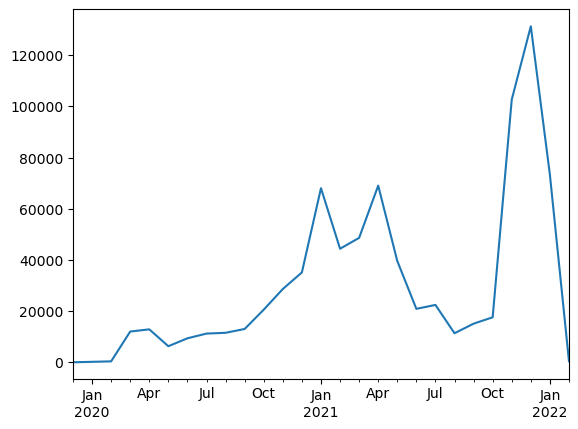

In [18]:
sample_month.value_counts().sort_index().plot() #by month the number of samples that were sequenced

### Observation.  

1. There was a jump in recorded sequences at the end of 2022.  Without more information we really don't know what caused the increase in data.

Next lets look at the sequences themselves.  We'll begin with the first nucleotide that was sequenced and designate that the reference nucleotide.

This reference sequence will be the fist one on our list with the nucleotide accession (ID) 'NC_045512.2' and we'll create a new list to add some variants.

In [19]:
metadata[metadata["sequence_type"] == "RefSeq"]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,NaT,PRJNA485481,NaN,Asia


The 'isolate_name' column contains information about the variant type, we'll search this column for the Delta and Omicorn variants using the pandas string accessor using the contains method for each name.  We'll also use the first North America Variant as a base reference sequence.

In [20]:
metadata[metadata["isolate_name"].str.contains("Delta").fillna(False)]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
85804,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-14,NaN,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
251375,OK091006.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,"SARS-CoV-2/human/JPN/SARS-CoV-2, B.1.617.2 lin...",29836,GenBank,complete,Asia; Japan,NaN,NaN,9606,2021-08-24,NaN,NaN,Asia
665095,OM108132.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-2/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-11,NaN,NaN,Asia


In [21]:
metadata[metadata["isolate_name"].str.contains("Omicron").fillna(False)]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


In [22]:
sequences = ["NC_045512.2", "OL467832.1", "OM061695.1", "OM095411.1" ] #nucleotide_ids will be our selected sequences

Using the sequences ID's we'll designate the common human_names.

We are going to search the metadata for the sequences in our reference list 'sequences'.

The 'selected_sequences' will use the nucleotide accession numbers to help dowload the RNA sequence for each of these from the NIH.  Each of the nucleotide sequence are 29 thousand plus charaters long as indicated by the 'nucleotide_length' column.

In [23]:
human_names = ["reference", "base", "delta", "omicron"]
selected_sequences = metadata[metadata["nucleotide_accession"].isin(sequences)]
selected_sequences

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,NaT,PRJNA485481,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
254609,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,NaT,NaN,NaN,North America
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


Next, we'll download the nucleotide sequences themselves using the library biopython.  We'll put the information in a dictionary called 'sequence_data' and take a look at the first nucleotide genome sequence.

This will be acheived by creating a custom function 'download_sequence()' to search the 'nucleotide' database.

Function components: 
* handle - search handle with the esearch function, to search a database db, and return only 1 value.
* record - will read the results of the handle variable
* handle - a second search of the database with fastA format(common format for this type of data), and text format to make it easy to work with.

In [24]:
def download_sequence(id_code):
    handle = Entrez.esearch(db="nucleotide", term=id_code, retmax="1")
    record = Entrez.read(handle)
    handle = Entrez.efetch(db="nucleotide", id=record["IdList"][0], rettype="fasta", retmode="text")
    return handle.read()

In [25]:
sequence_data = {}
for sequence in sequences:
    sequence_data[sequence] = {"fasta": download_sequence(sequence)}

In [26]:
first_key, first_value = next(iter(sequence_data.items()))
print(first_key, first_value)

NC_045512.2 {'fasta': '>NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome\nATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA\nCGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC\nTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG\nTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC\nCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC\nGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG\nCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT\nGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTC\nGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCT\nTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTA\nGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTG\nTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGG\nCCCTGATGGCTACCC

### Observation.
That is quite the sequence.

Now, we'll parse RNA Sequences obtained, create a temporary file object, then we'll create a new key which simplifies the data by converting the raw fasta strings into parsed sequence objects which simplifies further analysis. 

Data parsing is the process of transforming data from one format to another. In detail, data parsing is typically used for structuring data. This means converting unstructured data into structured or more structured data.

In [27]:
from Bio import SeqIO
import io

for k,v in sequence_data.items(): #paree through the keys and values
    f = io.StringIO(v["fasta"]) #fake temp file in the memory for python to work with it
    sequence_data[k]["parsed"] = list(SeqIO.parse(f, "fasta"))[0]  #parsed sequence

The sequence for the reference nucleotide looks like this:

In [28]:
sequence_data["NC_045512.2"]["parsed"]

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

Aligning RNA sequences.  There are 3 ways in which the virus changes which is known as the pattern of mutation.

1. **deletion** - a nuclotide can be removed from the original sequence to the variant sequence.
2. **insertion** - a new nucleotide cen be added to the variant sequence.
3. **substitution** - a nucleotide from original sequence the is shifted in the new sequence.

<img src="variants_01.jpg">

We'll figure out where the sequences align with an algorithm.

<img src="variants_02.jpg">  

The algorithm called "Needleman-Wunsch" will help to align the sequences and identify where they overlap, or where they are similar.

In [29]:
from Bio import Align #import the Align module from the Bio library
aligner = Align.PairwiseAligner() #create a class that will align the sequences

In [30]:
aligner.algorithm

'Needleman-Wunsch'

In [31]:
score = aligner.score(sequence_data["NC_045512.2"]["parsed"].seq, sequence_data["OM061695.1"]["parsed"].seq)
#we'll use the reference and the base variant to compare, the .seq property gets the genome sequence we will use

In [32]:
score #the alignment score from the ref score

29818.0

In [33]:
len(sequence_data["NC_045512.2"]["parsed"].seq) #length of the ref sequence

29903

In [34]:
29818/29903 #overlap percentage between the ref and the base variant

0.9971574758385446

In [35]:
import numpy as np

comparisons = np.zeros((4,4))

In [36]:
comparisons

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [37]:
for i in range(0, 4):  #compare the 4 sequences we are reviewing
    for j in range(0, i+1):
        score = aligner.score(sequence_data[sequences[i]]["parsed"].seq, sequence_data[sequences[j]]["parsed"].seq)
        comparisons[i,j]=score

In [38]:
comparisons_df = pd.DataFrame(comparisons, columns=human_names, index=human_names)

### Observation.

There is a .99715.. difference from the original variant and the delta variant, a score of its mutation.

Next we created a matrix to compare the other variants to compare each of the sequences and place the results in to the matrix into a dataframe to look at the results.

Next, the values in the matrix will show us the percentage% overlap across the sequences.

In [39]:
comparisons_df

,reference,base,delta,omicron
reference,29903.0,0.0,0.0,0.0
base,29820.0,29831.0,0.0,0.0
delta,29818.0,29775.0,29858.0,0.0
omicron,29725.0,29722.0,29688.0,29788.0


In [40]:
comparisons_df.iloc[:,0] / 29903

reference    1.000000
base         0.997224
delta        0.997157
omicron      0.994047
Name: reference, dtype: float64

### Obeservation.
Here is the overlap percentage of the variants from the reference genome:
Base variant overlap similarity is 99.7224% similiar.
Delta is 99.7157% similar.
Omicron is 99.4047% similiar.

This seems to be a small change in the sequence, but one would have to know more about virus mutation in order to qualify the rate of change in this comparison.

Now, we'll look at the mutation points of the reference variant and the delta omicron

In [41]:
seq1 = sequence_data["NC_045512.2"]["parsed"].seq
seq2 = sequence_data["OM061695.1"]["parsed"].seq
seq3 = sequence_data["OM095411.1"]["parsed"].seq

delta_alignments = aligner.align(seq1, seq2)
omicron_aligments = aligner.align(seq1, seq3)

In [42]:
delta_alignments

This object is a list of list identifying where the nucleotides aligned between the two sequences.  We'll look at the first item.

In [43]:
delta_alignment = delta_alignments[0]

In [44]:
delta_alignment.shape

(2, 29943)

In [45]:
omicron_alignment = omicron_aligments[0]
omicron_alignment.shape

(2, 29966)

This created a list of lists or tuple of tuples, showing an overlap in the sequences. The first list shows all the points of alignments in the first sequence and the the second list shows all the points of alignment in the second sequence.  It also alings the points of deletion and substitution.  

Where the genome sequences aligned to the **reference variant**:  

**Delta**: aligned in 29943 instances.  

**Omicron**: aligned in 29966 instances.

The next iteration will show where the sequences differ.

You'll see a list of items, a collection of lists numbered 1 and 2 and the differences will be listed.

In [46]:
seq1_end = None   
seq2_end = None

#zip lumps elements and we'll loop to print out the mismatch
for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end: alignments[0][0]]
        seq2_mismatch = seq2[seq2_end: alignments[1][0]]
        print("1: {}".format(seq1_mismatch))
        print("2: {}".format(seq2_mismatch))

    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]    

1: G
2: 
1: 
2: T
1: C
2: T
1: G
2: T
1: G
2: 
1: 
2: T
1: C
2: 
1: 
2: T
1: G
2: T
1: C
2: T
1: 
2: T
1: C
2: 
1: C
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: 
2: T
1: C
2: 
1: C
2: T
1: A
2: R
1: A
2: G
1: A
2: 
1: 
2: G
1: C
2: 
1: 
2: T
1: 
2: A
1: G
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: C
2: G
1: G
2: A
1: A
2: 
1: TTC
2: 
1: AG
2: 
1: T
2: 
1: 
2: G
1: C
2: 
1: 
2: A
1: A
2: G
1: C
2: G
1: G
2: 
1: 
2: A
1: G
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: C
2: T
1: T
2: 
1: 
2: C
1: T
2: 
1: 
2: C
1: C
2: T
1: 
2: C
1: T
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: G
2: 
1: TT
2: 
1: A
2: 
1: CT
2: 
1: A
2: 
1: A
2: G
1: 
2: T
1: G
2: 
1: 
2: T
1: G
2: 
1: G
2: T
1: G
2: T


Next, well code the differences to see what type of change occurred between 'deletion', 'insertion', and 'substitution'.

In [47]:
from IPython.display import HTML

In [48]:
def color_print(s, color="black"):
    return"<span style='color:{}'>{}</span>".format(color, s) #return HTML on jupyter notebook

In [49]:
seq1_end = None
seq2_end = None
display_seq = []

for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    if seq1_end and seq2_end:
        
        seq1_mismatch = seq1[seq1_end: alignments[0][0]]
        seq2_mismatch = seq2[seq2_end: alignments[1][0]]
        if len(seq2_mismatch) == 0: #deletion occured
            display_seq.append(color_print(seq1_mismatch, "red"))
        elif len(seq1_mismatch) == 0: #insertion
            display_seq.append(color_print(seq2_mismatch, "green"))
        else:
            display_seq.append(color_print(seq2_mismatch, "blue")) #substitution

    display_seq.append(seq1[alignments[0][0]:alignments[0][1]]) #match display the length

    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]    

In [50]:
display_seq = [str(i) for i in display_seq] #join the display as a string

Here is a guide:  

>**Black** - where the two sequences align.
>
>**<span style="color:red">Red</span>** - where a deletion occurred.
>
>**<span style="color:green">Green</span>** - where something was inserted by the delta variant.
>
>**<span style="color:blue">Blue</span>** - a substitution occurred.

In [51]:
display(HTML('<br>'.join(display_seq)))

# Summary and further exploration.

It was facinating to learn and explore aspects of how a virus like COVID 19 mutates, the amount of information that one genome contains, and how to identify and evaluate the differences across variants.

**We met our objectives of data sourcing, practicing data exploration and the creation of a report with insights and observations.**

Futher exploration could include:

* Convert the nucleotide to sequences to codons to explore shifts and changes in the proteins between variants.
* Identifying the most common substitution and deletion sites.
* "RNA codons and their mutational patterns can provide information helpful to combat infections and understanding viral behavior." [biomedcental.com](https://virologyj.biomedcentral.com/articles/10.1186/s12985-023-01982-8), [elifesciences.org](https://elifesciences.org/articles/78373)